## 🖼️ Analyze Images

**Vision** is the ability for a model to *"see"* and understand images. This includes:

- 🧠 Understanding **text** within images
- 🔍 Recognizing **objects**, **shapes**, **colors**, and **textures**
- 📸 Making sense of various **visual elements**

While models are powerful in visual comprehension, be aware that there are some **limitations** in complex scenes or ambiguous visuals.


In [16]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install matplotlib
!pip install Pillow

# Clean up the notebook
clean_notebook()


Notebook cleaned.


In [17]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

# 1.Image Analysis with URLs

```python

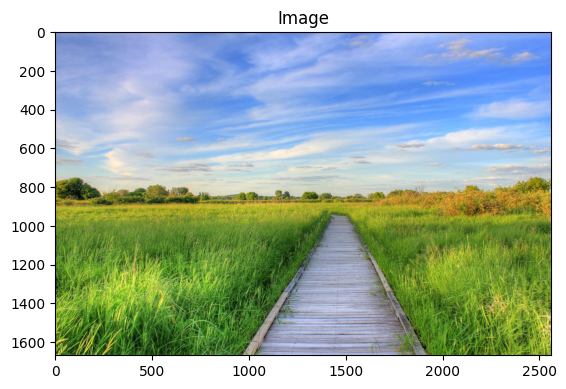

Image shape: (2560, 1669), Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [18]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

image = Image.open(BytesIO(requests.get(URL).content))
# display shape and type of the image
plt.imshow(image)
plt.title(f"Image")
plt.axis('on')
plt.show()

print(f"Image shape: {image.size}, Image type: {type(image)}")


In [19]:

import base64
from io import BytesIO
import os
from openai import OpenAI


# Initialize client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Define model
model_name = "gpt-4.1-mini"  

# Create chat completion with image input
response = client.chat.completions.create(
    model=model_name,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What's in this image? in thai language"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": URL,
                    },
                },
            ],
        }
    ],
)

# Print the assistant's reply
print(response.choices[0].message.content)


ในภาพนี้มีทางเดินไม้ทอดยาวผ่านทุ่งหญ้าสีเขียวใต้ท้องฟ้าสีฟ้าสดใส มีเมฆบางๆ กระจายอยู่ในท้องฟ้า และมีต้นไม้และพุ่มไม้ขึ้นอยู่โดยรอบทางเดินที่ทอดยาวนี้


## 1.1 Analyze images using URLs with multiple images


Analyzing image 1...

Assistant: ภาพนี้เป็นภาพของโจทย์และการแก้ปัญหาเกี่ยวกับการหาการกระจัด (displacement) ของรถยนต์ที่นักเรียนขับไปโรงเรียน โดยในโจทย์บอกว่ารถยนต์เคลื่อนที่ 8.33 กิโลเมตรไปทางทิศเหนือ จากนั้นเลี้ยวไปทางทิศตะวันออกเพื่อไปโรงเรียนอีก 3.67 กิโลเมตร

ในภาพมีการแสดงการคำนวณตามกฎของพีทาโกรัส (Pythagorean theorem) เพื่อหาการกระจัดซึ่งเป็นระยะทางตรงจากจุดเริ่มต้นจนถึงจุดสิ้นสุด โดยใช้สูตร

C = √[(3.67 km)² + (8.33 km)²]

จากนั้นคำนวณค่ากำลังสองของแต่ละด้าน และบวกกัน 

C = √(13.5 + 69.4) = √82.9 = 9.10 กม.

สรุปได้ว่าการกระจัดของรถยนต์คือ 9.10 กิโลเมตร

นอกจากนี้ยังมีภาพวาดประกอบรูปสามเหลี่ยมมุมฉากเพื่อช่วยอธิบายการใช้สูตรพีทาโกรัสในการหาค่าดังกล่าวด้วย


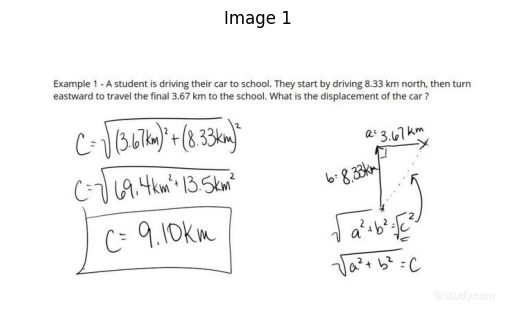


Analyzing image 2...

Assistant: ภาพนี้เป็นกราฟที่แสดงความสัมพันธ์ระหว่าง "อัตราส่วนราคาต่อกำไร (P/E ratio) ของดัชนี S&P 500" (เส้นสีแดง) กับ "อัตราดอกเบี้ยในสหรัฐอเมริกา" (เส้นสีดำ) ในช่วงปี 1881 ถึง 2008

วิเคราะห์ภาพในภาษาไทย:
- แกนแนวนอน (x-axis) แสดงปี ตั้งแต่ปี 1880 ถึง 2010
- แกนแนวตั้งซ้าย (y-axis ซ้าย) แสดงค่า P/E ratio อยู่ในช่วงประมาณ 0 ถึง 50
- แกนแนวตั้งขวา (y-axis ขวา) แสดงอัตราดอกเบี้ย อยู่ในช่วงประมาณ 0% ถึง 25%
- เส้นสีแดงแสดงการเปลี่ยนแปลงของค่า P/E ratio ของ S&P 500 ซึ่งมีช่วงที่พุ่งสูงมากในปี 1929, 1966, และ 2000 (ซึ่งเป็นจุดที่ฟองสบู่ตลาดหุ้นหรือช่วงก่อนวิกฤตทางการเงิน)
- เส้นสีดำแสดงการเปลี่ยนแปลงของอัตราดอกเบี้ย มีจุดสูงสุดในช่วงปี 1981 ซึ่งเป็นช่วงที่อัตราดอกเบี้ยสหรัฐสูงมากที่สุดในประวัติศาสตร์ ขณะที่ P/E ratio ในช่วงนั้นค่อนข้างต่ำ
- มีการเน้นปีสำคัญ เช่น 1901, 1921, 1929, 1932, 1941, 1966, 1981, 1982, 2000, 2003 ซึ่งอาจหมายถึงเหตุการณ์เศรษฐกิจหรือวิกฤตที่สำคัญในแต่ละช่วง
- โดยรวมแสดงให้เห็นความสัมพันธ์เชิงลบระหว่างอัตราดอกเบี้ยและ P/E ratio คือ เมื่ออัตราดอก

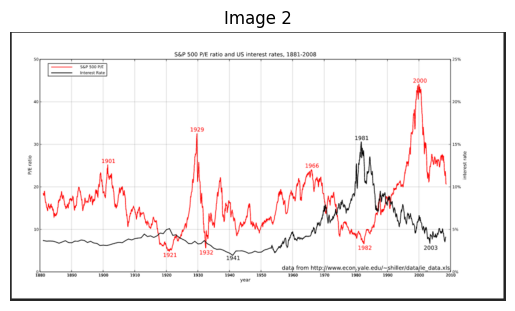


Analyzing image 3...

Assistant: ภาพนี้เป็นภาพร่างแบบของเว็บเพจเสนอขายสินค้าชื่อ "Awesome Product" โดยมีส่วนประกอบดังนี้:

- ด้านบนมีหัวข้อชื่อสินค้า "Awesome Product"
- ใต้หัวข้อมีช่องให้กรอกอีเมลและปุ่ม "Go" สำหรับส่งข้อมูล
- ด้านล่างมีแผนราคา 3 แบบ ได้แก่
  1. แผนแรกชื่อ "Pew" ราคา $2.99 ต่อเดือน
  2. แผนที่สองชื่อ "Bang" ราคา $9.99 ต่อเดือน
  3. แผนที่สามชื่อ "Pow" ราคา $99.99 ต่อเดือน

โดยรวมเป็นการออกแบบหน้าเว็บเพื่อให้ผู้ใช้งานเลือกแผนราคาหรือสมัครรับข้อมูลผ่านอีเมล


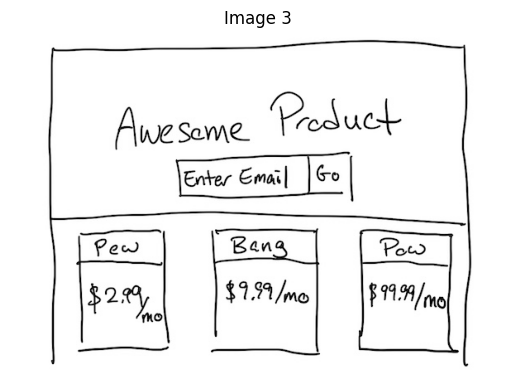

In [20]:
import os
from openai import OpenAI
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Initialize OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# List of image URLs to test
image_urls = [
    "https://github.com/lazyprogrammer/machine_learning_examples/blob/master/openai/physics_problem.jpeg?raw=true",
    "https://github.com/lazyprogrammer/machine_learning_examples/blob/master/openai/finance.png?raw=true",
    "https://github.com/lazyprogrammer/machine_learning_examples/blob/master/openai/webdesign.jpg?raw=true"
]

# Model name
model_name = "gpt-4.1-mini"   # This is the correct model for image analysis

# Iterate over URLs
for idx, url in enumerate(image_urls):
    print(f"\nAnalyzing image {idx + 1}...\n")

    # Call OpenAI API
    response = client.chat.completions.create(
        model=model_name,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "What's in this image? analyze this image in thai language"},
                    {"type": "image_url", "image_url": {"url": url}}
                ],
            }
        ]
    )

    # Print result
    print("Assistant:", response.choices[0].message.content)

    # Display the image using matplotlib
    image = Image.open(BytesIO(requests.get(url).content))
    plt.imshow(image)
    plt.title(f"Image {idx + 1}")
    plt.axis('off')
    plt.show()


# 2.Image Analysis with Base64 Encoding Images





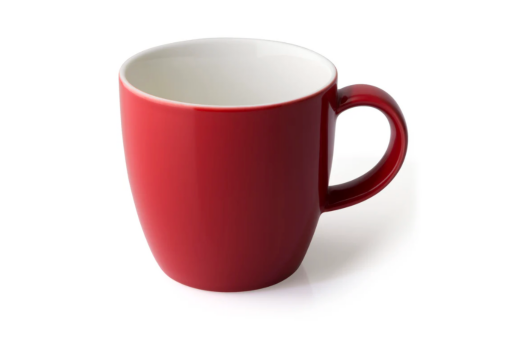

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
# Path to your image
image_path = "./cup01.png"

# Display the image 
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

## Change image to Base64 string

In [22]:
import base64

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


# Getting the Base64 string
base64_image = encode_image(image_path)

base64_image[:100]  # Displaying the first 100 characters of the Base64 string for brevity

'iVBORw0KGgoAAAANSUhEUgAAA6YAAAJhCAYAAABSGK1TAAAAAXNSR0IArs4c6QAAAERlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAA'

In [23]:
import base64
from openai import OpenAI


# Initialize OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
model_name = "gpt-4.1-mini"   # This is the correct model for image analysis


# Create a chat completion with image input
response = client.chat.completions.create(
    model=model_name,
    messages=[
        {
            "role": "user",
            "content": [
                { "type": "text", "text": "What's in this image? in thai language" },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    },
                },
            ],
        }
    ],
)

# Print the assistant's reply
print(response.choices[0].message.content)

ในภาพนี้มีถ้วยกาแฟสีแดงใบหนึ่งค่ะ
